In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data preparation and validation libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# Classifier libraries
from sklearn.tree import DecisionTreeClassifier

In [116]:
df = pd.read_csv('winequality-red.csv')

In [117]:
df['quality'] = np.where(df['quality'] >= 7, 1, 0)

### Preprocessing

In [118]:
X_train, X_test = train_test_split(df, test_size=0.20, random_state=42)
print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (1279, 12)
Test size:  (320, 12)


In [119]:
def oversample_dataset(data):
    X = data.drop(columns={'quality'})
    y = data['quality']
    
    sm = SMOTE(random_state=42)
    
    X_sm, y_sm = sm.fit_resample(X, y)
    sm_df = pd.concat([X_sm, y_sm], axis=1)
    
    return sm_df

X_train_sm = oversample_dataset(X_train)

In [120]:
y_train = X_train_sm['quality']
y_test = X_test['quality']
X_train = X_train_sm.drop(columns={'quality'})
X_test = X_test.drop(columns={'quality'})

print("Train size: ", X_train.shape)
print("Test size: ", X_test.shape)

Train size:  (2218, 11)
Test size:  (320, 11)


In [121]:
scaler = StandardScaler()

scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

### Model

<AxesSubplot:title={'center':'Max Depth vs Precision'}, xlabel='Max Depth', ylabel='Precision'>

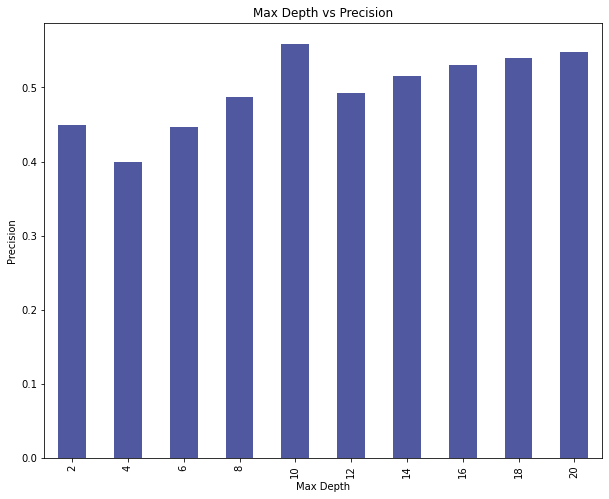

In [156]:
scores = []
depth = []

max_depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for i in max_depths:
    model = DecisionTreeClassifier(max_depth=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    depth.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Max Depth vs Precision")
plt.xlabel("Max Depth")
plt.ylabel("Precision")
pd.Series(scores, max_depths).plot(kind='bar', color="#50589F")

In [158]:
id_depth = pd.DataFrame(depth, columns=['feature', 'score'])['score'].idxmax()
max_depth = pd.DataFrame(depth, columns=['feature', 'score'])['feature'][id_depth]
print("max_depth:", max_depth)

max_depth: 10


<AxesSubplot:title={'center':'Max Features vs Precision'}, xlabel='Max Features', ylabel='Precision'>

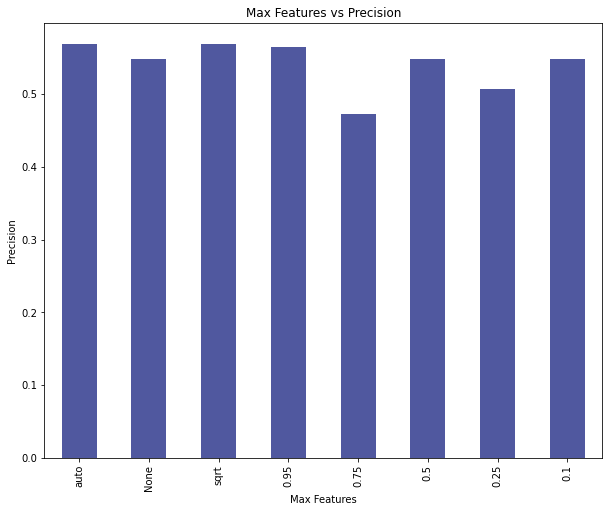

In [151]:
scores = []
features = []

max_features = ['auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]

for i in max_features:
    model = DecisionTreeClassifier(max_features=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    features.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Max Features vs Precision")
plt.xlabel("Max Features")
plt.ylabel("Precision")
pd.Series(scores, max_features).plot(kind='bar', color="#50589F")

In [159]:
id_features = pd.DataFrame(features, columns=['feature', 'score'])['score'].idxmax()
max_features = pd.DataFrame(features, columns=['feature', 'score'])['feature'][id_features]
print("max_features:", max_features)

max_features: auto


<AxesSubplot:title={'center':'Min Samples Leaf vs Precision'}, xlabel='Min Samples Leaf', ylabel='Precision'>

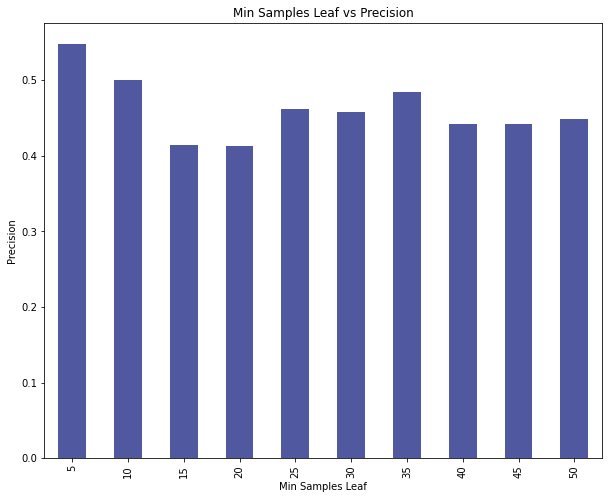

In [150]:
scores = []
leafs = []

min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]

for i in min_samples_leaf:
    model = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    score = precision_score(y_test, y_pred)
    scores.append(score)
    leafs.append([i, score])
    
plt.figure(figsize=(10,8))
plt.title("Min Samples Leaf vs Precision")
plt.xlabel("Min Samples Leaf")
plt.ylabel("Precision")
pd.Series(scores, min_samples_leaf).plot(kind='bar', color="#50589F")

In [160]:
id_leaf = pd.DataFrame(leafs, columns=['feature', 'score'])['score'].idxmax()
min_samples_leaf = pd.DataFrame(leafs, columns=['feature', 'score'])['feature'][id_leaf]
print("min_samples_leaf:", min_samples_leaf)

min_samples_leaf: 5


The code below brings all parameters chosen above and returns the best for each one of them according to your dataset.

In [161]:
def decision_tree_features(X_train, X_test, y_train, y_test):

    depths = []
    max_depths = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    for i in max_depths:
        model = DecisionTreeClassifier(max_depth=i, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = precision_score(y_test, y_pred)
        depths.append([i, score])
        
    id_depth = pd.DataFrame(depths, columns=['feature', 'score'])['score'].idxmax()
    max_depth = pd.DataFrame(depths, columns=['feature', 'score'])['feature'][id_depth]
    
    features = []
    max_features = ['auto', None, 'sqrt', 0.95, 0.75, 0.5, 0.25, 0.10]
    for i in max_features:
        model = DecisionTreeClassifier(max_features=i, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = precision_score(y_test, y_pred)
        features.append([i, score])

    id_feature = pd.DataFrame(features, columns=['feature', 'score'])['score'].idxmax()
    max_features = pd.DataFrame(features, columns=['feature', 'score'])['feature'][id_feature]
    
    leafs = []
    min_samples_leaf = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
    for i in min_samples_leaf:
        model = DecisionTreeClassifier(min_samples_leaf=i, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = precision_score(y_test, y_pred)
        leafs.append([i, score])
        
    id_leaf = pd.DataFrame(leafs, columns=['feature', 'score'])['score'].idxmax()
    min_samples_leaf = pd.DataFrame(leafs, columns=['feature', 'score'])['feature'][id_leaf]
    
    response = {
        "max_depth": max_depth,
        "max_features": max_features,
        "min_samples_leaf": min_samples_leaf
    }
        
    return response

In [162]:
decision_tree_features(X_train_scaled, X_test_scaled, y_train, y_test)

{'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 5}